## basic analysis of mag-comp bauer model

* ....
* model comparison

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os
import arviz as az

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
target_folder = op.join(bids_folder, f'derivatives/cogmodels_magjudge')
params_folder = op.join(bids_folder,'derivatives/phenotype')

sns.set_context('talk')


In [2]:
from utils import get_data

df = get_data(bids_folder)
group_list = df.reset_index().drop_duplicates(subset=['subject', 'group'])[['subject', 'group']].set_index('subject')


number of subjects found: 66
number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


## Model Comparison

In [3]:
target_folder = op.join(bids_folder, f'derivatives/cogmodels_magjudge')

model_1 =  az.from_netcdf(op.join(target_folder, f'model-1_trace.netcdf'))
#model_2 =  az.from_netcdf(op.join(target_folder, f'model-2_trace.netcdf'))
model_3 =  az.from_netcdf(op.join(target_folder, f'model-3_trace.netcdf'))
model_4 =  az.from_netcdf(op.join(target_folder, f'model-4_trace.netcdf'))
model_5 =  az.from_netcdf(op.join(target_folder, f'model-5_trace.netcdf'))
model_6 =  az.from_netcdf(op.join(target_folder, f'model-6_trace.netcdf'))
model_flexNoiseReg1 =  az.from_netcdf(op.join(target_folder, f'model-flexNoiseReg1_trace.netcdf'))
model_flexNoiseReg2 =  az.from_netcdf(op.join(target_folder, f'model-flexNoiseReg2_trace.netcdf'))


In [6]:
#compare_dict = {"model 1": model_1, "model 3": model_3, "model 4": model_4} # "model 2": model_2,
compare_dict = {"n1/n2, no fit prior": model_1,
                 #"n1/n2, fit prio, all regs": model_2,
                "per/mem noise, no fit prior": model_3, 
                "per/mem noise, fit prior": model_4, 
                "per/mem noise, fit prior, only prior_sd group reg": model_5,
                "n1/n2, fit prior, only prior_sd group reg": model_6,
                #"flexNoise n1/n2": model_flexNoiseReg1,
                #"flexNoise same noises": model_flexNoiseReg2 # TypeError: Encountered error in ELPD computation of compare.
                }

az.compare(compare_dict)

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/mrenke/mambaforge/envs/

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
"per/mem noise, fit prior, only prior_sd group reg",0,-3822.209837,135.663703,0.000000,8.956312e-01,64.773104,0.000000,True,log
"per/mem noise, fit prior",1,-3823.052213,136.891497,0.842376,0.000000e+00,64.844956,0.933489,True,log
"n1/n2, fit prior, only prior_sd group reg",2,-3826.553401,140.696220,4.343564,7.040513e-02,64.679658,3.374291,True,log
"n1/n2, no fit prior",3,-3898.896539,85.261423,76.686702,3.396371e-02,64.086731,12.476358,True,log
"per/mem noise, no fit prior",4,-3905.832681,71.048953,83.622843,2.089440e-13,64.659052,12.493144,True,log


### 

### Get subwise estimates



In [3]:
from utils_02 import get_subwise_params

model_label = 1
idata =  az.from_netcdf(op.join(target_folder, f'model-{model_label}_trace.netcdf'))

sd_mem = get_subwise_params(idata, 'n1_evidence_sd',group_list=group_list)
sd_per = get_subwise_params(idata, 'n2_evidence_sd',group_list=group_list)

sds = pd.concat([sd_mem, sd_per], axis=1)
sds = sds.join(group_list)

#sds.to_csv(op.join(params_folder, f'magjudge_bauer-{model_label}_sds.csv'))

In [ ]:
model_label = 3
idata =  az.from_netcdf(op.join(target_folder, f'model-{model_label}_trace.netcdf'))

sd_mem = get_subwise_params(idata, 'memory_noise_sd',group_list=group_list)
sd_per = get_subwise_params(idata, 'perceptual_noise_sd',group_list=group_list)

sds = pd.concat([sd_mem, sd_per], axis=1)
sds = sds.join(group_list)

#sds.to_csv(op.join(params_folder, f'magjudge_bauer-{model_label}_sds.csv'))

/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mrenke/mambaforge/envs/behav_fit/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


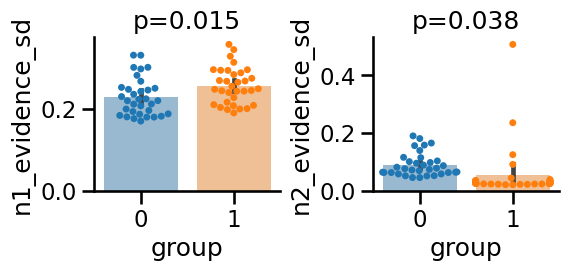

In [5]:
import pingouin as pg

df_param = sds
df_param = df_param.set_index('group', append=True)

fig, ax = plt.subplots(1,2, figsize=(6,2))
for i,y_var in enumerate(df_param.columns): 
    sns.barplot(ax=ax[i],data=df_param.reset_index(), x='group', y=y_var, hue='group',alpha=0.5)
    sns.swarmplot(ax=ax[i], data=df_param.reset_index(), x='group', y=y_var,  hue='group',size=5)
    an = pg.anova(data=df_param.reset_index(), dv=y_var, between='group')
    p_val = np.round(an['p-unc'][0],3)

    ax[i].set(title=f'p={p_val}') # ylim=(0.,0.4),
    ax[i].legend().remove()
    sns.despine()
plt.subplots_adjust(wspace=0.5)


In [63]:
df_param.to_csv(op.join(params_folder, f'magjudge_bauer-{model_label}_sds.csv'))

In [64]:
df_param

,n1_evidence_sd,n2_evidence_sd,group
subject,,,
1,0.199131,0.082536,0
2,0.294919,0.035016,1
3,0.300479,0.115566,0
4,0.200174,0.030707,1
5,0.223037,0.159042,0
...,...,...,...
62,0.175875,0.052763,0
63,0.206875,0.181617,0
64,0.219300,0.087886,0


### ppcs

In [32]:
model.free_parameters

{'n1_evidence_sd': {'mu_intercept': -1.0, 'transform': 'softplus'},
 'n2_evidence_sd': {'mu_intercept': -1.0, 'transform': 'softplus'}}

In [23]:
variable_names = list(idata.posterior.data_vars.keys())
variable_names

['n1_evidence_sd_mu',
 'n1_evidence_sd_offset',
 'n2_evidence_sd_mu',
 'n2_evidence_sd_offset',
 'n1_evidence_sd_sd',
 'n2_evidence_sd_sd',
 'n1_evidence_sd',
 'n2_evidence_sd']

In [31]:
n1 = softplus(idata['posterior']['n1_evidence_sd_mu']).to_dataframe().reset_index('n1_evidence_sd_regressors').rename(mapper={'n1_evidence_sd_regressors':'regressor'}, axis=1)
n1.head()

regressor  n1_evidence_sd_mu
chain draw                              
0     0     Intercept           0.227168
      0         group           0.864315
      1     Intercept           0.223017
      1         group           0.746213
      2     Intercept           0.236774